# Test a Perceptual Phenomenon - Stroop effect

## Background Information
In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example $\color{red}{Red}$, $\color{royalblue}{Blue}$. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example $\color{forestgreen}{Purple}$, $\color{darkorchid}{Green}$. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

## Questions For Investigation


<b>Q1. What is our independent variable? What is our dependent variable?</b>
* Independent Variable: condition (congruent words condition or incongruent words condition)
* Dependent Variable: reaction time (the time it takes to name the ink colors)

<b>Q2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.</b>

<p>We only have data from small sized (24) samples. our mission is to estimate the entire population. So I expect to perform the dependent t-test for paired samples.</p><p>Our null hypothesis assumes that there is no significant statistical difference in reaction time between the congruent and incongruent conditions. On the other hand, our alternative hypothesis assumes that the reaction time under incongruent condition is significantly higher than congruent condition.</p>
* $ H_0: \mu_{difference} = \mu_{incongruent} - \mu_{congruent} = 0 $
* $ H_A: \mu_{difference} = \mu_{incongruent} - \mu_{congruent} >= 0 $

We will use $\alpha$ = .05 to determine statistical significance.

<b>Q3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.</b>

In [1]:
# import all necessary packages and functions
import numpy as np
import pandas as pd
import scipy as sp
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# read the file
file_in  = 'stroopdata.csv'
df = pd.read_csv(file_in)

In [2]:
# descriptive statistics of the two conditions
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


The mean of sample under incongruent condition is 22.02, and standard deviation is 4.80. They are much higher than these statistics under congruent condition.

In [3]:
# descriptive statistics of the difference
dif = df.Incongruent - df.Congruent
difference = pd.DataFrame({"Difference":dif})
difference.describe()

,Difference
count,24.000000
mean,7.964792
std,4.864827
min,1.950000
25%,3.645500
50%,7.666500
75%,10.258500
max,21.919000


Correspondingly the statistics of sample difference are quite high.

<b>Q4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.</b>

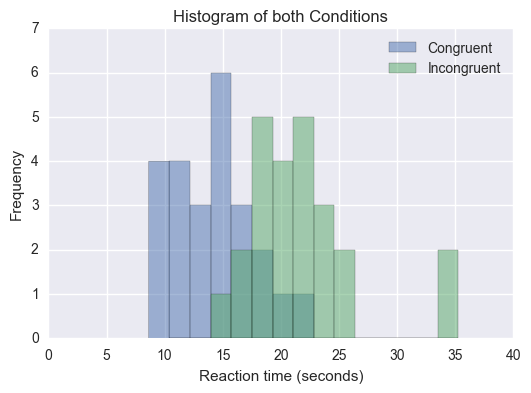

In [4]:
# histogram of both conditions
title = 'Histogram of both Conditions'
plot = df.plot(title=title, kind='hist', alpha=0.5, bins=15)
label = plt.xlabel('Reaction time (seconds)')
window = plt.axis([0,40,0,7])

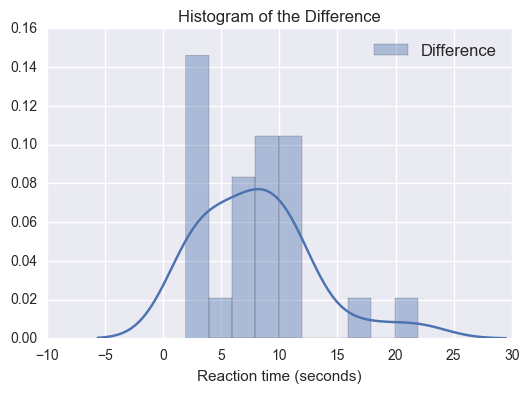

In [5]:
# histogram of the difference
fig, axs = plt.subplots()
sns.distplot(difference, bins=10, label='Difference')
plt.legend(prop={'size':12})
axs.set_title('Histogram of the Difference')
axs.set_xlabel('Reaction time (seconds)')

Each sample difference is positive. That means each participant of the sample takes more times to naming the color under incongruent condition.

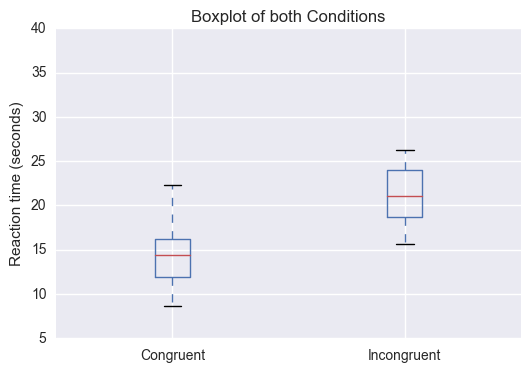

In [6]:
# boxplot of both conditions
title = 'Boxplot of both Conditions'
plot = df.plot(title=title, kind='box')
label = plt.ylabel('Reaction time (seconds)')

Compare to the congruent condition, the reaction time under incongruent condition are of higher range. In this boxplot, we can see that the majority of data under incongruent condition are above the IQR of congruent condition.

Q5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [7]:
# calculate statistics
mean = difference.mean()
median = difference.median()
variance = difference.var(ddof=1)
s = difference.std()
n = len(difference)
df = n - 1
se = s / math.sqrt(n)

# t-statistic
t = round(mean / se, 2)
p = sp.stats.t.sf(t, df)
print 't({}) = {}, p < .001, one-tailed'.format(df, t)

t(23) = 8.02, p < .001, one-tailed


In [8]:
# confidence interval
# set alpha level .01
t_critical = 1.714
margin_of_error = t_critical * se
ci_lower_bound = round(mean - margin_of_error, 2)
ci_upper_bound = round(mean + margin_of_error, 2)
print 'confident interval on the mean difference: 95% CI = ({}, {})'.format(ci_lower_bound, ci_upper_bound)

confident interval on the mean difference: 95% CI = (6.26, 9.67)


In [9]:
# effect size
# r squared
r_squared = round(np.square(t)/(np.square(t)+df), 2)
print 'r squared = {}'.format(r_squared)

r squared = 0.74


<p>Our point estimate for population mean difference is 4.96.</p>

<p>Our $t_{statistic}$ (23 degrees of freedom) is 8.02, which is much more higher than the $t_{critical}$ 1.714 ($\alpha$ level .001, 23 degrees of freedom). This indicates that the mean difference 4.96 is not likely to have occurred by chance.</p>

<p>Our 95% interval estimate for population mean (in difference) is from 6.26 to 9.67, which means that 95% sample means (in difference) fall within this interval.</p>

<p>Our $R^2$ is 0.74, which indicates that the model explains 74% the variability of the response data around its mean.</p>

#### Result
<p>Based on the above statistical test, the null hypothesis should be rejected. Instead we accept the alternative hypothesis that the reaction time under incongruent condition is significantly higher than congruent condition.</p>

<b>Q6. What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!</b>

The theories like 'processing speed', 'automaticity' and 'parallel distributed processing' all sound reasonable to me. But I think it's not going to be that easy. Maybe there is a lag in the brain's ability to recognize the color of the word, for people more rational, but not for perceptual ones. And for those who often deal with colors, automaticity performance might become to their specialty. For one thing we can make sure is that interference will slow down the processing speed of our brain. The influence level will depend on both different interferences and different brains.



We could run an experiment combined Stroop and visual search, for example, use images with two kinds of animal (one on the left, the other on the right side) and an arrow (pointing to left or right side randomly), ask the participants to speak out the side of given animal.